In [1]:
try:
    import numpy as np
    import matplotlib.pyplot as plt
    import cv2
except Exception as e:
    print("Importing Error: {}".format(e))

### FFT

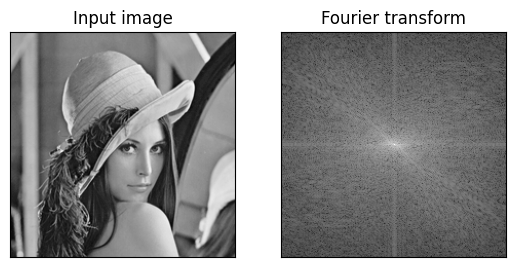

In [7]:
image = cv2.imread("../images/lenna.png", cv2.IMREAD_GRAYSCALE)

# Fourier transform
f_transform = np.fft.fft2(image)

# shift
f_transform_shifted = np.fft.fftshift(f_transform)

# Get the abstract value
f_transform_magnitude = np.abs(f_transform_shifted)

# Get the Logarithm
f_transform_log = np.log(f_transform_magnitude + 1)  # add +1, prevents division by 0 error

# Draw the plot
plt.subplot(121), plt.imshow(image, cmap="gray")
plt.title("Input image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(f_transform_log, cmap="gray")
plt.title("Fourier transform"), plt.xticks([]), plt.yticks([])

plt.show()

### Band-Pass Filter

* It keeps the medium frequinces

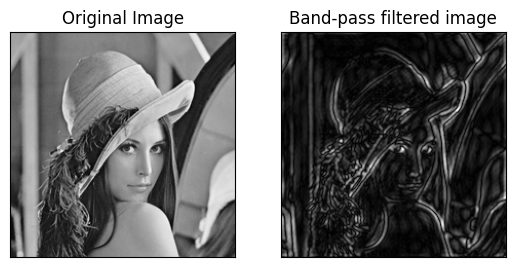

In [27]:
# We took the fft of the image above
##########

# Center Coordinates
rows, cols = image.shape
center_row, center_col = rows // 2, cols // 2  

# Low and High Widths for band-pass filter
low_width = 10
high_width = 50

# Created a mask
mask = np.zeros((rows, cols), np.uint8)
mask[center_row - high_width:center_row + high_width, center_col - high_width:center_col + high_width] = 1
mask[center_row - low_width:center_row + low_width, center_col - low_width:center_col + low_width] = 0

# Take reverse fft for band-pass filter
fshift_filtered = f_transform_shifted * mask
f_filtered = np.fft.ifftshift(fshift_filtered)
image_filtered = np.abs(np.fft.ifft2(f_filtered))
image_filtered = np.uint8(image_filtered)

# Draw the plots
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(image_filtered, cmap='gray')
plt.title('Band-pass filtered image'), plt.xticks([]), plt.yticks([])
plt.show()



### Manmade vs. Natural Images

#### 1. Manmade Images

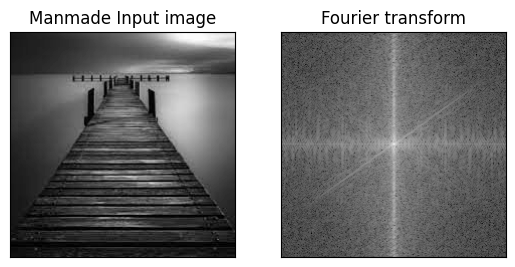

In [37]:
"""
Manmade image have a cross fourier transform
"""
manmade_image = cv2.imread("../images/manmade.jfif", cv2.IMREAD_GRAYSCALE)

# Fourier transform
f_transform = np.fft.fft2(manmade_image)

# shift
f_transform_shifted = np.fft.fftshift(f_transform)

# Get the abstract value
f_transform_magnitude = np.abs(f_transform_shifted)

# Get the Logarithm
f_transform_log = np.log(f_transform_magnitude + 1)  # add +1, prevents division by 0 error

# Draw the plot
plt.subplot(121), plt.imshow(manmade_image, cmap="gray")
plt.title("Manmade Input image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(f_transform_log, cmap="gray")
plt.title("Fourier transform"), plt.xticks([]), plt.yticks([])

plt.show()

#### 2. Natural Images

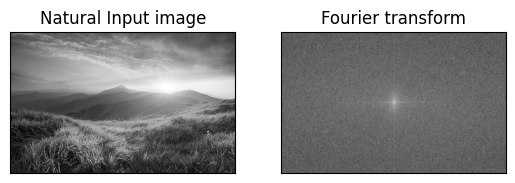

In [41]:
"""
Natural image not as sharp and not as straight, so the fourier transform is more diffuse
"""
manmade_image = cv2.imread("../images/natural.jpg", cv2.IMREAD_GRAYSCALE)

# Fourier transform
f_transform = np.fft.fft2(manmade_image)

# shift
f_transform_shifted = np.fft.fftshift(f_transform)

# Get the abstract value
f_transform_magnitude = np.abs(f_transform_shifted)

# Get the Logarithm
f_transform_log = np.log(f_transform_magnitude + 1)  # add +1, prevents division by 0 error

# Draw the plot
plt.subplot(121), plt.imshow(manmade_image, cmap="gray")
plt.title("Natural Input image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(f_transform_log, cmap="gray")
plt.title("Fourier transform"), plt.xticks([]), plt.yticks([])

plt.show()